# Catch Basin Classifier
An image classifier written in Python with Tensorflow. Classifies catch basins in 3 classes.

The three classes are:
* `blocked` 🠊 0
* `clear` 🠊 1
* `partial` 🠊 2

## Imports

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras import layers
from PIL import Image
from glob import glob
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

## Compute Average Image Size
The average image size is computed to ensure that all images are of the same width and height. This will be done by resizing all the images to the average dimension.

In [9]:
widths = []
heights = []

for path in glob('data/**/*.JPG'):
    with Image.open(path) as img:
        widths.append(img.width)
        heights.append(img.height)

In [10]:
image_size = round(sum(widths) / len(widths)), round(sum(heights) / len(heights))
image_size

(554, 732)

## Load and Prepare Data
Load the data and split into two groups: *training* and *validation*

In [11]:
training_dataset = tf.keras.utils.image_dataset_from_directory("data", validation_split=0.2, subset="training", seed=321, image_size=image_size)
validation_dataset = tf.keras.utils.image_dataset_from_directory("data", validation_split=0.2, subset="validation", seed=321, image_size=image_size)

# Get list of classnames to verify that the class names were interpreted correctly
training_dataset.class_names

Found 51 files belonging to 3 classes.
Using 41 files for training.
Found 51 files belonging to 3 classes.
Using 10 files for validation.


['blocked', 'clear', 'partial']

## Construction of the Model
Contruct a convolutional neural network. A `Rescaling` Layer is added to normalize `RGB` values. 

In [19]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=(*image_size, 3)),
    layers.Conv2D(16, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='tanh'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 554, 732, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 554, 732, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 277, 366, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 277, 366, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 138, 183, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 138, 183, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 69, 91, 64)       

## Training
Begin training the model with `training_dataset` and `validation_dataset` for 15 epochs.

In [20]:
epochs = 5

history = model.fit(
  training_dataset,
  validation_data=validation_dataset,
  epochs=epochs
)

Epoch 1/5
2/2 [==============================] - 9s 2s/step - loss: 14.7254 - accuracy: 0.2195 - val_loss: 22.6975 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 8s 2s/step - loss: 25.5766 - accuracy: 0.3902 - val_loss: 6.1223 - val_accuracy: 0.1000
Epoch 3/5
2/2 [==============================] - 8s 2s/step - loss: 6.0455 - accuracy: 0.3415 - val_loss: 18.5702 - val_accuracy: 0.1000
Epoch 4/5
2/2 [==============================] - 9s 3s/step - loss: 8.2673 - accuracy: 0.3902 - val_loss: 9.4247 - val_accuracy: 0.4000
Epoch 5/5
2/2 [==============================] - 9s 2s/step - loss: 10.1067 - accuracy: 0.3171 - val_loss: 7.3501 - val_accuracy: 0.4000


## Training Analysis
See how the model did. 

Collect metrics.

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Graph the metrics

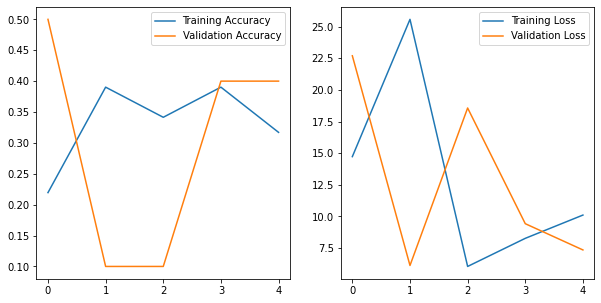

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

Print out metrics such as accuracy and loss.

In [29]:
print('accuracy:', acc[-1], 'val_accuracy:', val_acc[-1])
print('loss', loss[-1], 'val_loss:', val_loss[-1])

accuracy: 0.31707316637039185 val_accuracy: 0.4000000059604645
loss 10.106748580932617 val_loss: 7.3501386642456055


## Save the Model
Save the model so that it can be loaded again for future use.

In [31]:
saved_models = pathlib.Path.cwd() / 'saved_models'
if not saved_models.exists():
    saved_models.mkdir()


model_dirs = list(saved_models.iterdir())
if len(model_dirs) == 0: 
    model.save(saved_models / 'model-0')
else:
    num_strs = map(lambda x: x[len("model-")], saved_models.iterdir())
    num = list(map(lambda x: int(x), num_strs))[-1] + 1
    model.save(saved_models / f'model-{num}')

INFO:tensorflow:Assets written to: C:\Users\SA\Desktop\Programming\projects\catch_basin_classifier\saved_models\model-0\assets
